In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# 2. Load Dataset
df = pd.read_csv("churn_data.csv")  # Use the correct path


In [4]:
# 3. Basic Overview
print("🔍 Dataset Shape:", df.shape)
print("🧾 Columns:", df.columns.tolist())
print("📋 Data Types:\n", df.dtypes)
print("🔍 First 5 Rows:")
display(df.head())

🔍 Dataset Shape: (7043, 21)
🧾 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
📋 Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
🔍 First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 4. Handle Missing Values
print("\n❓ Null values:\n", df.isnull().sum())

# Convert 'TotalCharges' to numeric if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


❓ Null values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\conta\AppData\Local\Temp\ipykernel_11664\1526084354.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\conta\AppData\Local\Temp\ipykernel_11664\1484856765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


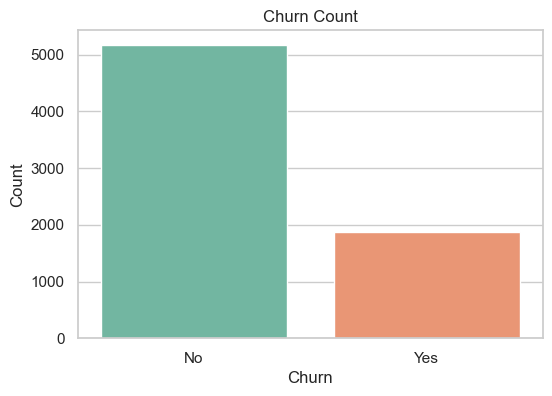

In [6]:
# 5. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

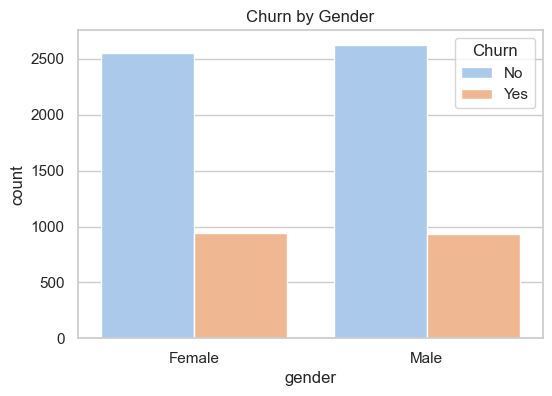

In [7]:
# 6. Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='pastel')
plt.title("Churn by Gender")
plt.show()

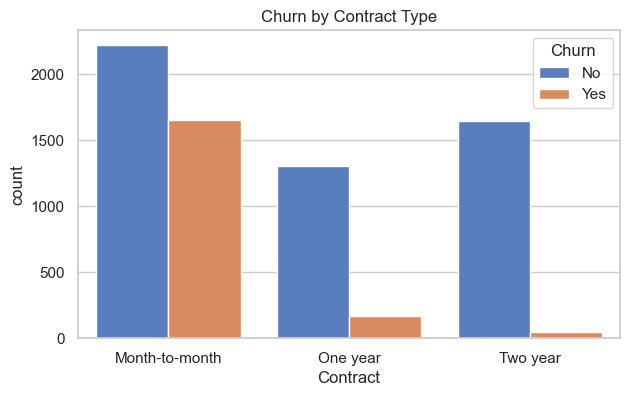

In [8]:
# 7. Churn by Contract Type
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='muted')
plt.title("Churn by Contract Type")
plt.show()

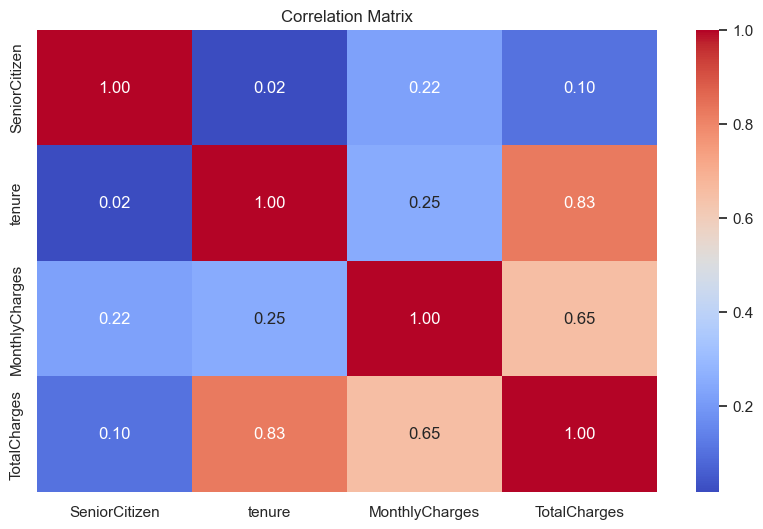

In [9]:
# 8. Correlation Heatmap (Numerical Only)
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

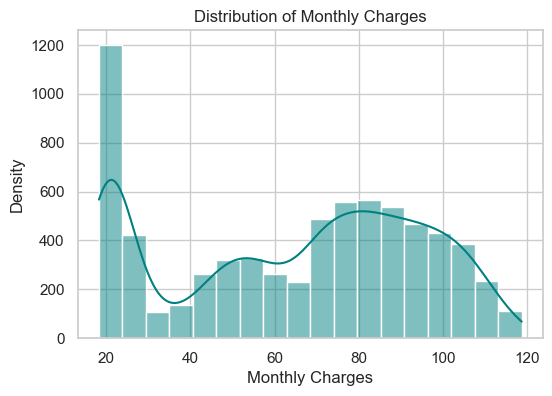

In [10]:
# 9. Distribution of Monthly Charges
plt.figure(figsize=(6, 4))
sns.histplot(df['MonthlyCharges'], kde=True, color='teal')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_11664\3794178127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')


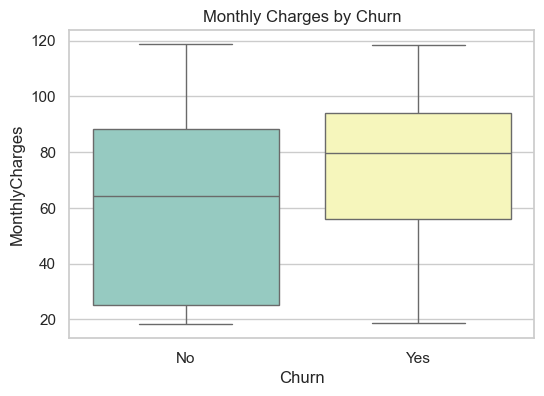

In [11]:
# 10. Boxplot of Monthly Charges by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')
plt.title("Monthly Charges by Churn")
plt.show()

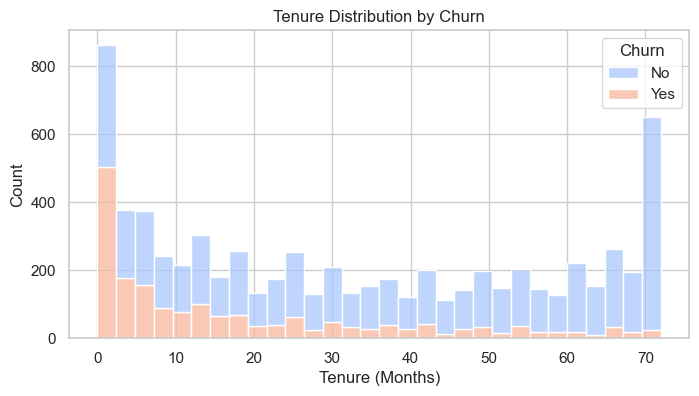

In [12]:
# 11. Tenure Distribution by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.show()

In [13]:
# 12. Save clean dataset (Optional)
df.to_csv("cleaned_churn_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_churn_data.csv'")

✅ Cleaned dataset saved as 'cleaned_churn_data.csv'
